In [174]:
from layout import getLayout
import util
from searchAgents import mazeDistance

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from functools import lru_cache
from itertools import combinations
import random

class FakeGameState:
    
    def __init__(self):
        self.lay = getLayout('mediumSearch.lay')
    
    def getWalls(self):
        return self.lay.walls
    
    def getFood(self):
        return self.lay.food
    
    def getPacmanPosition(self):
        return lay.agentPositions[0]

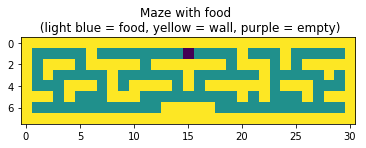

In [192]:
gameState = FakeGameState()
walls = np.array(gameState.getWalls().data)
food = np.array(gameState.getFood().data)
plt.imshow(np.transpose(walls + 0.5 * food))
plt.title('Maze with food \n (light blue = food, yellow = wall, purple = empty)')
plt.show()

In [176]:
foodList = gameState.getFood().asList()
x, y = random.choice(foodList), random.choice(foodList)

In [177]:
%timeit mazeDistance(x, y, gameState)

948 µs ± 79.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [224]:
%timeit {f : i+1 for i, f in enumerate(foodList)}

15.5 µs ± 332 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [178]:
@lru_cache(maxsize = None)
def foodAdjacencyMatrix(gameState):
    foodList = gameState.getFood().asList()
    foodIndices = {f : i+1 for i, f in enumerate(foodList)}
    numFood = len(foodList)
    adjM = np.zeros((numFood + 1, numFood + 1))
    for f1, f2 in combinations(foodList, 2):
        i, j = foodIndices[f1], foodIndices[f2]
        adjM[i, j] = adjM[j, i] = mazeDistance(f1, f2, gameState)
    return adjM

In [179]:
%%timeit
foodAdjacencyMatrix.cache_clear()
foodAdjacencyMatrix(gameState)

5.32 s ± 681 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


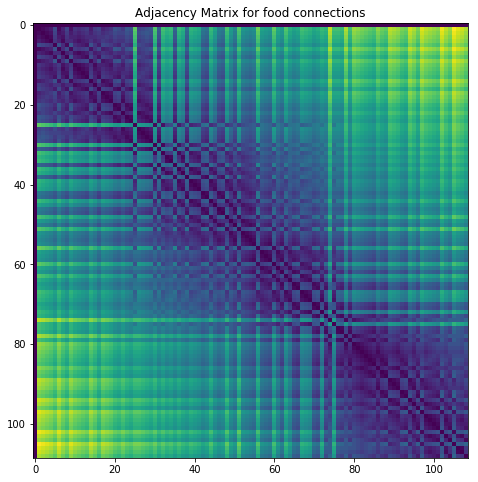

In [180]:
plt.figure(figsize = (8, 8))
plt.imshow(foodAdjacencyMatrix(gameState))
plt.title('Adjacency Matrix for food connections')
plt.show()

In [215]:
def minimumSpanningTreeTotalWeight(adjM):
    g = nx.from_numpy_matrix(adjM)
    mst = nx.minimum_spanning_tree(g)
    return sum(e[2]['weight'] for e in mst.edges(data=True))

In [216]:
minimumSpanningTreeTotalWeight(foodAdjacencyMatrix(gameState))

107.0

In [219]:
def foodAdjMatrixAfterEating(initialGameState, foodLeft):
    foodList = gameState.getFood().asList()
    foodIndices = {f : i+1 for i, f in enumerate(foodList)}
    M = foodAdjacencyMatrix(initialGameState).copy()
    for f in set(foodList).difference(set(foodLeft)):
        i = foodIndices[f]
        M[i, :] = M[:, i] = 0
    return M

In [220]:
foodList = gameState.getFood().asList()
foodIndices = {f : i+1 for i, f in enumerate(foodList)}
eatenFood = foodList[25:50] 
foodLeft = list(set(foodList).difference(set(eatenFood)))

In [222]:
%timeit foodAdjMatrixAfterEating(gameState, foodLeft)

265 µs ± 61.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


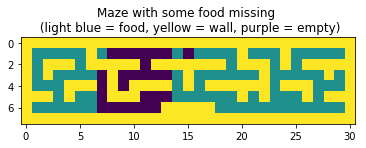

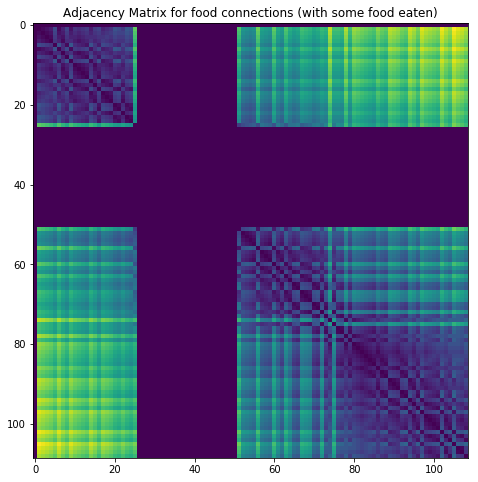

In [223]:
walls = np.array(gameState.getWalls().data)
food = np.array(gameState.getFood().data)
for x, y in eatenFood:
    food[x, y] = False
plt.imshow(np.transpose(walls + 0.5 * food))
plt.title('Maze with some food missing \n (light blue = food, yellow = wall, purple = empty)')
plt.show()

plt.figure(figsize = (8, 8))
plt.imshow(foodAdjMatrixAfterEating(gameState, foodLeft))
plt.title('Adjacency Matrix for food connections (with some food eaten)')
plt.show()

In [227]:
minimumSpanningTreeTotalWeight(foodAdjMatrixAfterEating(gameState, foodLeft))

97.0

In [226]:
minimumSpanningTreeTotalWeight(foodAdjMatrixAfterEating(gameState, []))

0